1
<class 'list'>
205
<class 'list'>

Filename.........: /home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: GSM714049, 
Patient id.......: GSM714049
Modality.........: CT
Study Date.......: 19901011
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: ['0.976562', '0.976562']
Slice location...: -581.000000

Filename.........: /home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/000001.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: GSM714049, 
Patient id.......: GSM714049
Modality.........: CT
Study Date.......: 19901011
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: ['0.976562', '0.976562']
Slice location...: -691.500000

Filename.........: /home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo

000016.dcm
-887.000000
524288
000005.dcm
-878.500000
524288
000006.dcm
-814.750000
524288
000019.dcm
-797.750000
524288
000012.dcm
-780.750000
524288
000011.dcm
-729.750000
524288
000017.dcm
-717.000000
524288
000009.dcm
-712.750000
524288
000001.dcm
-691.500000
524288
000013.dcm
-678.750000
524288
000010.dcm
-670.250000
524288
000015.dcm
-657.500000
524288
000007.dcm
-649.000000
524288
000014.dcm
-636.250000
524288
000003.dcm
-632.000000
524288
000018.dcm
-627.750000
524288
000000.dcm
-581.000000
524288
000002.dcm
-572.500000
524288


SyntaxError: 'return' outside function (<ipython-input-91-61b49e2221d4>, line 127)

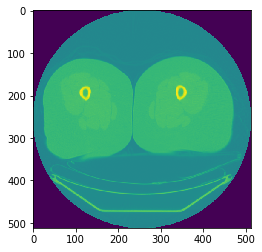

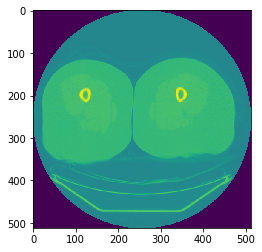

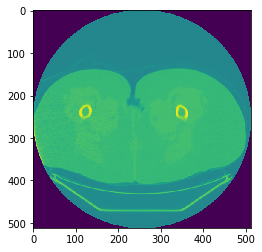

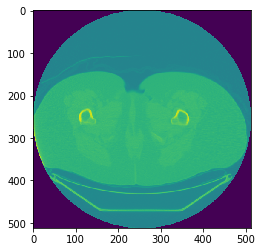

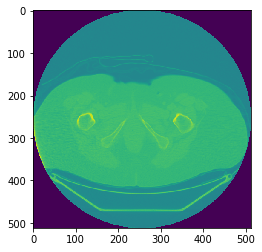

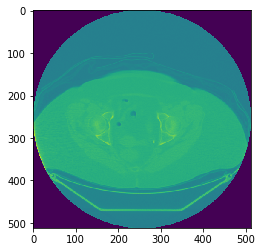

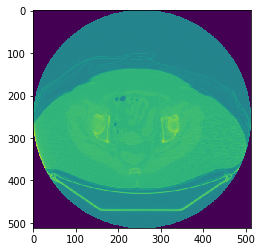

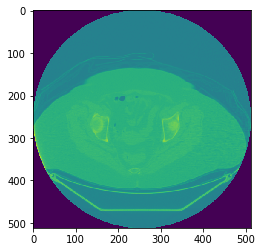

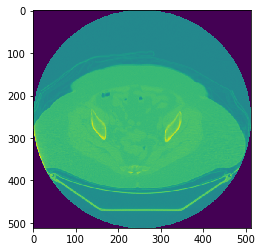

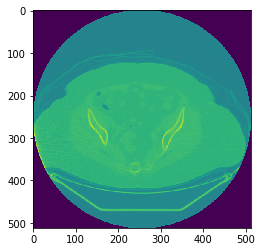

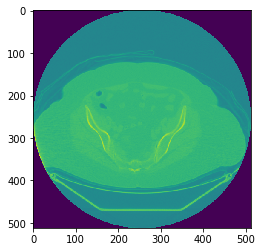

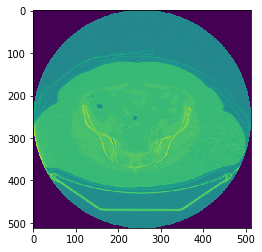

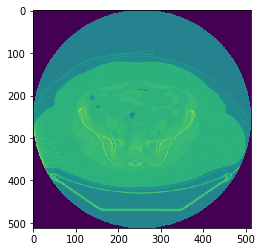

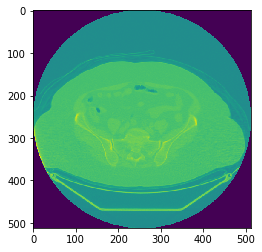

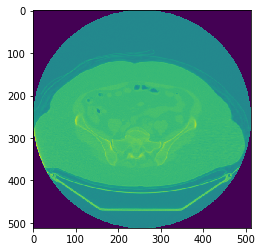

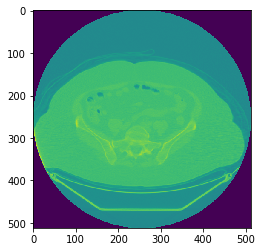

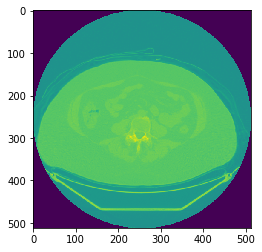

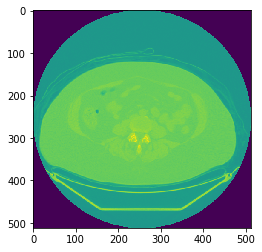

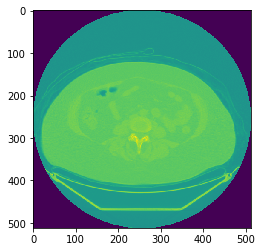

In [91]:
'''
Sample code to read dicom images and place slices as channels of RGB
'''
import matplotlib.pyplot as plt
import numpy as np
import os
import pydicom
from pydicom.data import get_testdata_files
from PIL import Image #for RGB manipulation


filename = get_testdata_files("rtplan.dcm")[0]
ds = pydicom.dcmread(filename)  # plan dicom_data
ds.PatientName
setup_names = ds.dir("setup")

print(len(setup_names))
print(type(setup_names))
setup_names


#
#sample images
#
#/home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/

dicom_dir = '/home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/'

image_dir = '/home/kgonzalez/COMSCI_168_SPRING_2019/Project/RGB'

files = sorted(os.listdir(dicom_dir))
#files=files.sort
print(len(files))
print(type(files))

position = {}
file_dict = {}

for ii in files[0:20]:
    full_file = os.path.join(dicom_dir, ii)
    #full_file = os.join(dicom_dir,ii)
    dicom_data = pydicom.dcmread(full_file)
    # Normal mode:
    print()
    print("Filename.........:", full_file)
    print("Storage type.....:", dicom_data.SOPClassUID)
    print()
    
    pat_name = dicom_data.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name...:", display_name)
    print("Patient id.......:", dicom_data.PatientID)
    print("Modality.........:", dicom_data.Modality)
    print("Study Date.......:", dicom_data.StudyDate)
    
    #check to make sure raw data is in the file
    if 'PixelData' in dicom_data:
        rows = int(dicom_data.Rows)
        cols = int(dicom_data.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dicom_data.PixelData)))
    if 'PixelSpacing' in dicom_data:
        print("Pixel spacing....:", dicom_data.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dicom_data.get('SliceLocation', "(missing)"))

    
    #assign slice position
    location = dicom_data.get('SliceLocation', "(missing)")
    position[ii] = location
    file_dict[ii]= full_file
    
    
    

# plot the image using matplotlib
    #plt.figure()
    #plt.imshow(dicom_data.pixel_array, cmap='bone')
    #plt.colorbar()
    #plt.show()
    
#sort dictionary to get the slice order
newpos = {}

for key, value in sorted(position.items(), key=lambda item: item[1]):
    #print("%s: %s" % (key, value))
    newpos[key] = value
    

    
for ii in range(0,len(position)-1):
    #slice = list(newpos.keys())[ii]
    #print(slice)
    #a = next(iter(newpos.values()))
    #print(a)
    
    slice = list(newpos.keys())[ii-1]
    print(slice)
    print(newpos[slice])
    full_file_r = os.path.join(dicom_dir, slice)
    slice = list(newpos.keys())[ii]
    full_file_g = os.path.join(dicom_dir, slice)
    slice = list(newpos.keys())[ii+1]
    full_file_b = os.path.join(dicom_dir, slice)
    
    dicom_data_r = pydicom.dcmread(full_file_r)
    dicom_data_g = pydicom.dcmread(full_file_g)
    dicom_data_b = pydicom.dcmread(full_file_b)
    
    #(dicom_data.PixelData)
    #full_file = os.join(dicom_dir,ii)
    #dicom_data = pydicom.dcmread(full_file)
    # r, g, and b are 512x512 float arrays with values >= 0 and < 1.
    rgbArray = np.zeros((cols,rows,3), 'uint8')
    print(len(dicom_data_g.PixelData))
    
    plt.figure()
    plt.imshow(dicom_data_g.pixel_array)
    
    rgbArray[:,:, 0] = dicom_data_r.pixel_array
    rgbArray[:,:, 1] = dicom_data_g.pixel_array
    rgbArray[..., 2] = dicom_data_b.pixel_array
    img = Image.fromarray(rgbArray)
    
    rgb_file = os.path.join(image_dir, 'rgb' + str(ii) + '.png')
    img.save(rgb_file)
    
    #position[ii]
return





In [62]:
newpos

{'000016.dcm': "-887.000000",
 '000005.dcm': "-878.500000",
 '000006.dcm': "-814.750000",
 '000019.dcm': "-797.750000",
 '000012.dcm': "-780.750000",
 '000011.dcm': "-729.750000",
 '000017.dcm': "-717.000000",
 '000009.dcm': "-712.750000",
 '000001.dcm': "-691.500000",
 '000013.dcm': "-678.750000",
 '000010.dcm': "-670.250000",
 '000015.dcm': "-657.500000",
 '000007.dcm': "-649.000000",
 '000014.dcm': "-636.250000",
 '000003.dcm': "-632.000000",
 '000018.dcm': "-627.750000",
 '000000.dcm': "-581.000000",
 '000002.dcm': "-572.500000",
 '000008.dcm': "-568.250000",
 '000004.dcm': "-487.500000"}